In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Categorical variable and Countinuos variable 

In [ ]:
catvar=trainbog.select_dtypes(exclude=["int64","float64"])
norvar=trainbog.select_dtypes(exclude=["object"])

## Remove constant columns

In [ ]:
#remove Duplicate and constant columns
# remove constant columns
remove = []
for col in df_train.columns:
    if df_train[col].std() == 0:
        remove.append(col)

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)


## Remove duplicate columns 

In [ ]:
remove = []
c = df_train.columns
for i in range(len(c)-1):
    v = df_train[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,df_train[c[j]].values):
            remove.append(c[j])

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)

## Null Values

In [ ]:
testbog.isnull().sum(axis=0).sort_values(ascending=False).head(50)
#Replcae null values
catvar[['ENGAGEMENT_TAG_prev1']]=catvar[['ENGAGEMENT_TAG_prev1']].fillna('LOW')
#Percentage
len(testbog[pd.isnull(testbog["column"])])/len(testbog)

## Train vs Test data intersection by ID 

In [ ]:
testbog[["UCIC_ID"]][~testbog[["UCIC_ID"]].index.isin(trainbog[["UCIC_ID"]].index)].count()

## Remove outlier

In [ ]:
lLimit=np.percentile(trainbog["age"],1)
uLimit=np.percentile(trainbog["age"],99)
trainbog["age"].loc[trainbog['age']>lLimit] = lLimit
trainbog["age"].loc[trainbog['age']>uLimit] = uLimit
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<10) & (trainbog['Recency_of_Activity']>4)] = 2

## Conversion categorical variable to onehot encoder scikit Learn 

In [ ]:
encoded_x = None
for i in range(0, trainCat.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(trainCat.iloc[:,i])
    feature = feature.reshape(trainCat.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

## Coutplot variable vs target variable

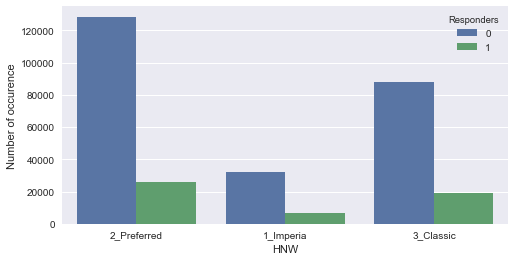

In [6]:
trainbog=pd.read_csv("/Users/sandip/Data/Analytic_vidhya/BoG/train_zsTMYVA/train.csv")
plt.figure(figsize=(8,4))
sns.countplot(data=trainbog,x="HNW_CATEGORY",hue='Responders')
plt.ylabel("Number of occurence")
plt.xlabel('HNW')
plt.show()

## Scatter Plot

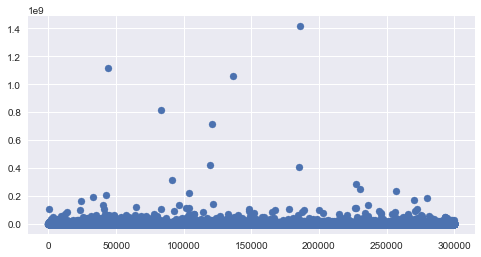

In [8]:
plt.figure(figsize=(8,4))
plt.scatter(trainbog.index,trainbog.BAL_prev1.values)
plt.show()

# Data Distrubution

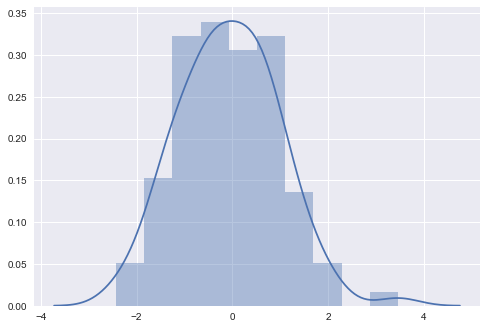

In [32]:
x = np.random.randn(100)
sns.distplot(x)
plt.show()

## Estimators - XGBoost classifier

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = xgb.XGBClassifier(missing=np.nan, max_depth=7, n_estimators=700, learning_rate=0.03,
                          nthread=4, subsample=0.8, colsample_bytree=0.8, seed=4242)
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## Competition submission

In [ ]:
predictions=model.predict_proba(testF)[:,1]
submission = pd.DataFrame({
        "UCIC_ID": testbog["UCIC_ID"],
        "Responders": predictions
    })
submission.to_csv('bog7.csv', index=False)